The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


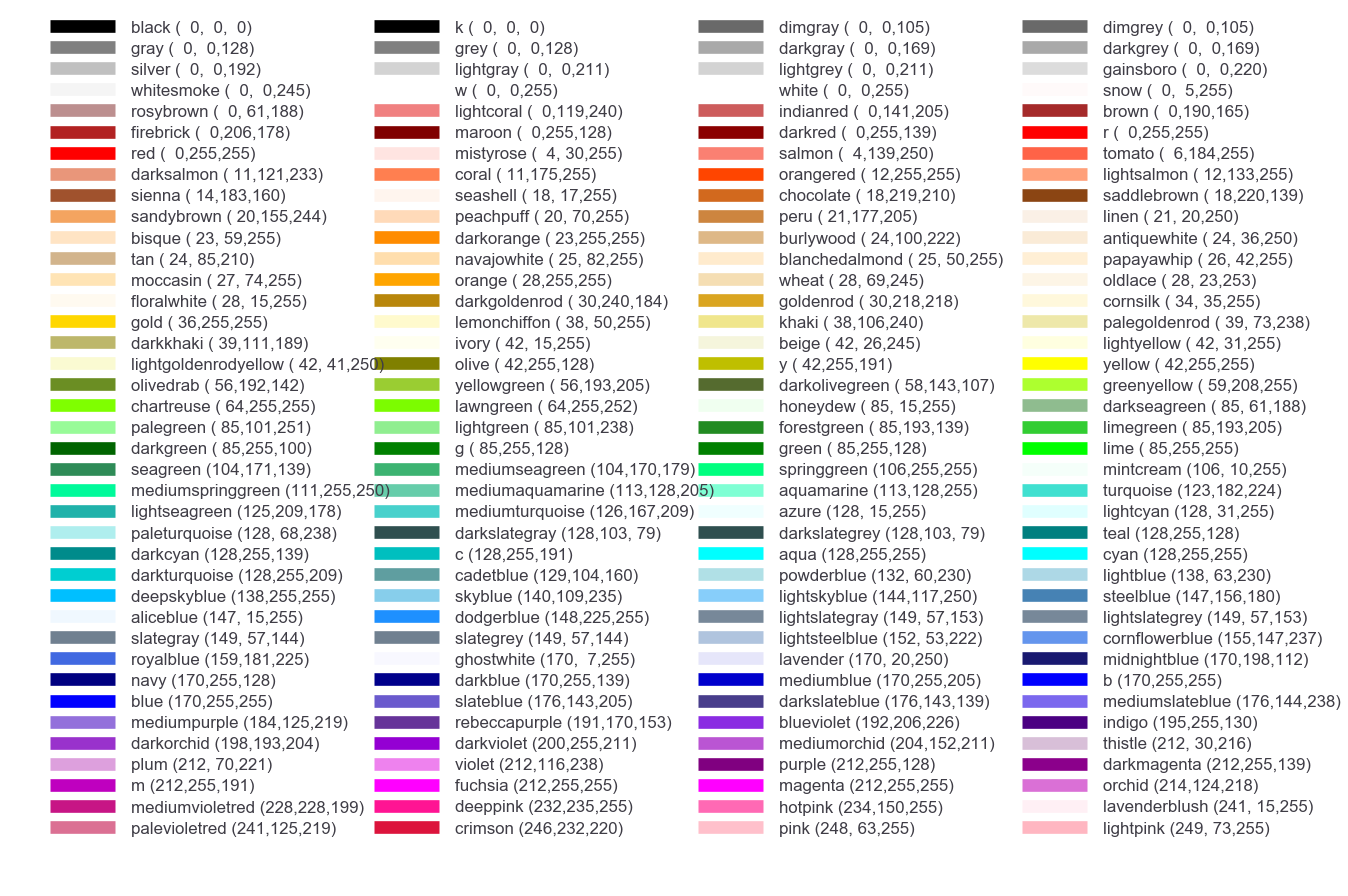

In [12]:
"""
========================
Visualizing named colors
========================

Simple plot example with the named colors and its visual representation.
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
sorted_hsv   = [ (hsv, name) for hsv, name in by_hsv]
n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(18, 12))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, (hsv, name) in enumerate(sorted_hsv):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)
    R = round(hsv[0] * 255,0)
    G = round(hsv[1] * 255,0)
    B = round(hsv[2] * 255,0)
    RGB = ' ({:3.0f},{:3.0f},{:3.0f})'.format(hsv[0]*255, hsv[1]*255,hsv[2]*255)
    ax.text(xi_text, y, name+ RGB, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()